<a href="https://colab.research.google.com/github/afrojaakter/Pattern-Recognition/blob/main/Sparcity_Compression_Underdetermined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

# Solve y = Theta * s for "s"
n = 1000 # dimension of s
p = 200  # number of measurements, dim(y)
Theta = np.random.randn(p,n)
y = np.random.randn(p)

# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x,ord=1)

constr = ({'type': 'eq', 'fun': lambda x:  Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y # initialize with L2 solution
res = minimize(L1_norm, x0, method='SLSQP',constraints=constr)
s_L1 = res.x

In [2]:
# L2 Minimum norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y

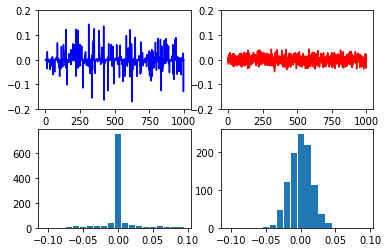

In [3]:
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1,color='b',LineWidth=1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2,color='r',LineWidth=1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)
axs[3].hist(s_L2,bins=np.arange(-0.105,0.105,0.01),rwidth=0.9)

plt.show()

First column is for L1 and the second column is for L2 regularizer